In [1]:
from datasets import load_dataset

dataset = load_dataset("scene_parse_150", "instance_segmentation")

/home/tamukake/Github/HuBMAP/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Found cached dataset scene_parse_150 (/home/tamukake/.cache/huggingface/datasets/scene_parse_150/instance_segmentation/1.0.0/d998c54e1b5c5bad12b4d2ec7e1a5f74eee4c153bc1b089a0001677ae9b3fd75)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 480.21it/s]


In [2]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'annotation'],
        num_rows: 20210
    })
    test: Dataset({
        features: ['image', 'annotation'],
        num_rows: 3352
    })
    validation: Dataset({
        features: ['image', 'annotation'],
        num_rows: 2000
    })
})

In [49]:
!!wget https://raw.githubusercontent.com/CSAILVision/placeschallenge/master/instancesegmentation/instanceInfo100_train.txt

['--2023-06-28 21:41:14--  https://raw.githubusercontent.com/CSAILVision/placeschallenge/master/instancesegmentation/instanceInfo100_train.txt',
 'raw.githubusercontent.com (raw.githubusercontent.com) をDNSに問いあわせています... 2606:50c0:8002::154, 2606:50c0:8001::154, 2606:50c0:8003::154, ...',
 'raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443 に接続しています... 接続しました。',
 'HTTP による接続要求を送信しました、応答を待っています... 200 OK',
 '長さ: 3313 (3.2K) [text/plain]',
 '‘instanceInfo100_train.txt’ に保存中',
 '',
 '     0K ...                                                   100%  142M=0s',
 '',
 '2023-06-28 21:41:14 (142 MB/s) - ‘instanceInfo100_train.txt’ へ保存完了 [3313/3313]',
 '']

In [53]:

import pandas as pd

data = pd.read_csv('instanceInfo100_train.txt',
                   sep='\t', header=0,)
data.head(5)
     

,Idx,Object Names,Unnamed: 2,#Inst.,#Pix. per Inst.(*1e3)
0,1,bed,2189,49.06,NaN
1,2,windowpane,8833,10.57,NaN
2,3,cabinet,6727,12.59,NaN
3,4,person,21441,3.47,NaN
4,5,door,4694,11.82,NaN


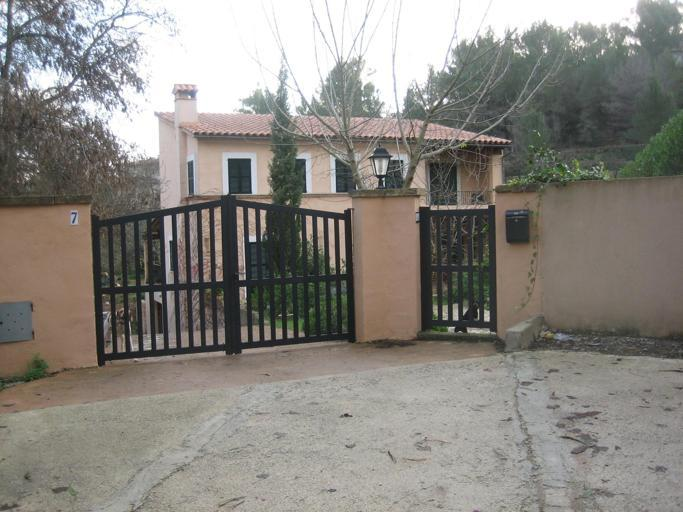

In [3]:

example = dataset['train'][1]
image = example['image']
image

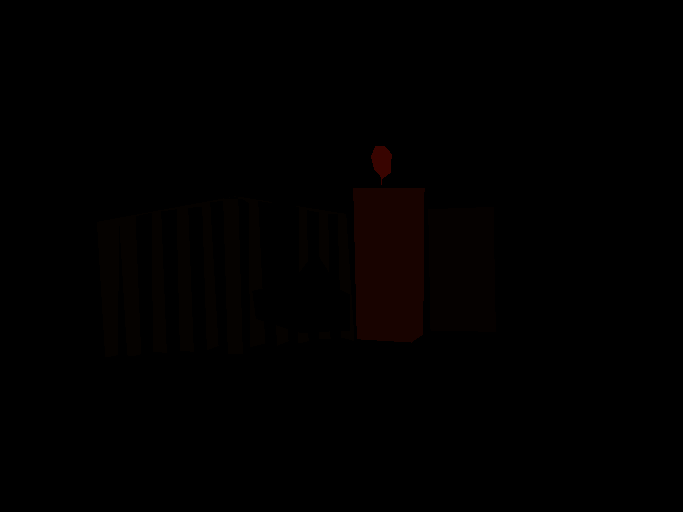

In [4]:
example['annotation']

In [5]:

import numpy as np

seg = np.array(example['annotation'])
# get green channel
instance_seg = seg[:, :, 1]
instance_seg

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [55]:

id2label = {id: label.strip() for id, label in enumerate(data["Object Names"])}
print(id2label)
     

{0: 'bed', 1: 'windowpane', 2: 'cabinet', 3: 'person', 4: 'door', 5: 'table', 6: 'curtain', 7: 'chair', 8: 'car', 9: 'painting', 10: 'sofa', 11: 'shelf', 12: 'mirror', 13: 'armchair', 14: 'seat', 15: 'fence', 16: 'desk', 17: 'wardrobe', 18: 'lamp', 19: 'bathtub', 20: 'railing', 21: 'cushion', 22: 'box', 23: 'column', 24: 'signboard', 25: 'chest of drawers', 26: 'counter', 27: 'sink', 28: 'fireplace', 29: 'refrigerator', 30: 'stairs', 31: 'case', 32: 'pool table', 33: 'pillow', 34: 'screen door', 35: 'bookcase', 36: 'coffee table', 37: 'toilet', 38: 'flower', 39: 'book', 40: 'bench', 41: 'countertop', 42: 'stove', 43: 'palm', 44: 'kitchen island', 45: 'computer', 46: 'swivel chair', 47: 'boat', 48: 'arcade machine', 49: 'bus', 50: 'towel', 51: 'light', 52: 'truck', 53: 'chandelier', 54: 'awning', 55: 'streetlight', 56: 'booth', 57: 'television receiver', 58: 'airplane', 59: 'apparel', 60: 'pole', 61: 'bannister', 62: 'ottoman', 63: 'bottle', 64: 'van', 65: 'ship', 66: 'fountain', 67: 'w

Visualizing instance: streetlight


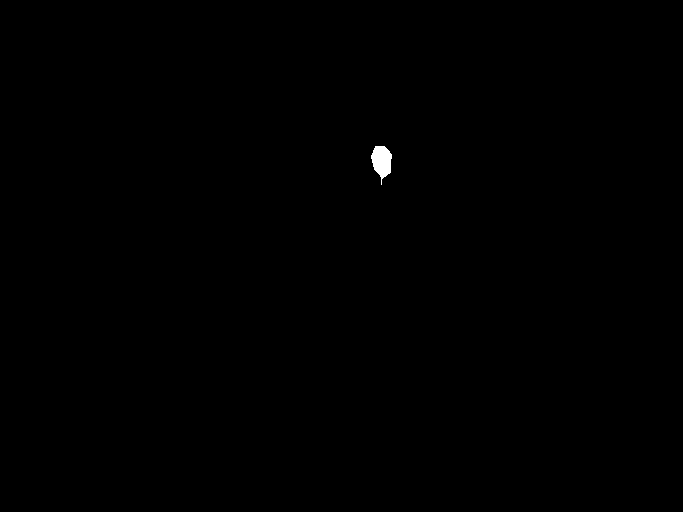

In [62]:
from PIL import Image

print("Visualizing instance:", id2label[inst2class[4] - 1])

# let's visualize the first instance (ignoring background)
mask = (instance_seg == 4)
visual_mask = (mask * 255).astype(np.uint8)
Image.fromarray(visual_mask)

In [18]:
instance_seg = np.array(example["annotation"])[:,:,1] # green channel encodes instances
class_id_map = np.array(example["annotation"])[:,:,0] # red channel encodes semantic category
class_labels = np.unique(class_id_map)

# create mapping between instance IDs and semantic category IDs
inst2class = {}
for label in class_labels:
    instance_ids = np.unique(instance_seg[class_id_map == label])
    inst2class.update({i: label for i in instance_ids})
print(inst2class)

{0: 0, 1: 5, 2: 5, 3: 24, 4: 56}


In [12]:
print(np.max(class_id_map),np.min(class_id_map))

56 0


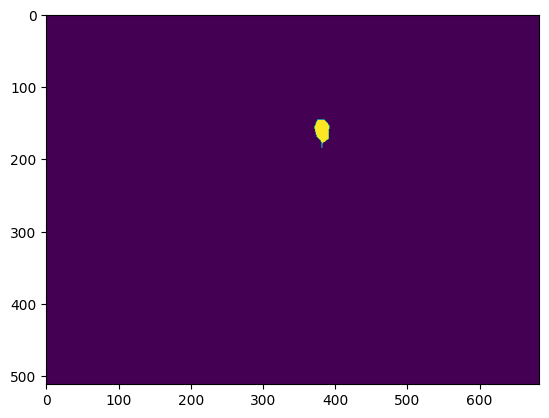

In [48]:
import matplotlib.pyplot as plt
plt.imshow(((class_id_map == 56) * 255).astype(np.uint8))

In [33]:
class_id_map

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [34]:
t = (class_id_map == 0)
visual_mask = (t * 255).astype(np.uint8)